# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
#ваш код 
# Подгрузим дата фрейм
df = pd.read_csv('Advertising.csv')

# Удалим первый столбец, так как он по сути повторяет индексы
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(3)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [3]:
#ваш код 
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [4]:
#ваш код 
# Пропусков нет

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [5]:
#ваш код 
X = df.drop('sales', axis=1).values
y = df['sales'].values

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [6]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [7]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [8]:
num_iters = 10000
m = X.shape[0]
n = X.shape[1]
w = np.zeros((X.shape[1], 1))
for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  X[:,k].T @ (y - h)
        # Вычисляем функцию потерь
        cost = sum(((X @ w) - y)**2)/(len(y))
print(f'Веса модели: {w[:, 0]}')

Веса модели: [ 41.56217205 110.13144155  73.52860638  -0.55006384]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [9]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(f'Веса модели: {model.coef_[0]}')

Веса модели: [ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [10]:
#ваш код
# Выбор признаков и целевой переменной
X = df.drop('sales', axis=1).values
y = df['sales'].values

# Масштабирование признаков
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std


**Добавим единичный столбец**

In [11]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [12]:
#ваш код
def mse_error(real_values, predictions):
    mse = np.mean((real_values - predictions) ** 2)
    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [13]:
#ваш код
y_pred_naive = np.mean(y)
mse_naive = mse_error(y, y_pred_naive)
print(f'MSE для наивного прогноза: {mse_naive:.2f}')

MSE для наивного прогноза: 27.09


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [14]:
#ваш код
def lin_pred(X, w):
    predictions = X.dot(w)
    return predictions

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [15]:
#ваш код
def stoch_grad_step(X, y, w, train_ind, eta):
    # Количество объектов в выборке
    n_samples = X.shape[0]

    # Получение объекта обучающей выборки и соответствующего ему реального значения
    x_i = X[train_ind]
    y_i = y[train_ind]

    # Предсказание для данного объекта
    y_pred_i = np.dot(x_i, w)

    # Вычисление градиента функции потерь для данного объекта
    grad_i = (y_pred_i - y_i) * x_i * 2 / n_samples

    # Обновление весов
    new_w = w - eta * grad_i
    return new_w

In [16]:
print(w.shape) # В данный момент размерность вектора (4, 1)
print(w)
stoch_grad_step(X, y, w, 10, 0.01) # Из-за размерности w, мы получаем на выходе пакет обновлённых весов

(4, 1)
[[ 41.56217205]
 [110.13144155]
 [ 73.52860638]
 [ -0.55006384]]


array([[ 41.5779396 ,  41.54726925,  41.54357845,  41.55756025],
       [110.14720911, 110.11653876, 110.11284796, 110.12682976],
       [ 73.54437393,  73.51370358,  73.51001278,  73.52399458],
       [ -0.53429629,  -0.56496663,  -0.56865744,  -0.55467563]])

In [17]:
print(w[:, 0].shape) # Если привести размерность w к строке на выходе получим более адекватный шаг
print(w[:, 0])
stoch_grad_step(X, y, w[:, 0], 10, 0.01) # Хотя тут мы получаем не шаг градиентного спуска, а веса w обновлённые на вычесленный шаг

(4,)
[ 41.56217205 110.13144155  73.52860638  -0.55006384]


array([ 41.5779396 , 110.11653876,  73.51001278,  -0.55467563])

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [18]:
# ваш код
def stochastic_gradient_descent(X, y, w_initial, eta, max_iter, weight_diff_threshold):
    # Инициализация
    w = np.array(w_initial)
    weight_diff = np.inf  # Начальное расстояние между векторами весов
    mse_errors = []  # Список для фиксации ошибок
    iter_count = 0  # Счетчик итераций
    w_values_list = []

    # Основной цикл
    while weight_diff > weight_diff_threshold and iter_count < max_iter:
        # Генерация случайного индекса из доступного диапазона
        random_ind = np.random.randint(len(y))

        # Текущая ошибка и запись в вектор ошибок
        current_mse = mse_error(y, lin_pred(X, w))
        mse_errors.append(current_mse)

        # Вычисление текущего шага стохастического спуска
        new_w = stoch_grad_step(X, y, w, random_ind, eta)

        # Рассчет евклидова расстояния между старым и новым векторами весов
        weight_diff = np.sqrt(np.sum((new_w - w) ** 2))

        w_values_list.append(new_w)

        # Обновление весов и счетчика итераций
        w = new_w
        iter_count += 1

    return w, mse_errors, iter_count, w_values_list

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

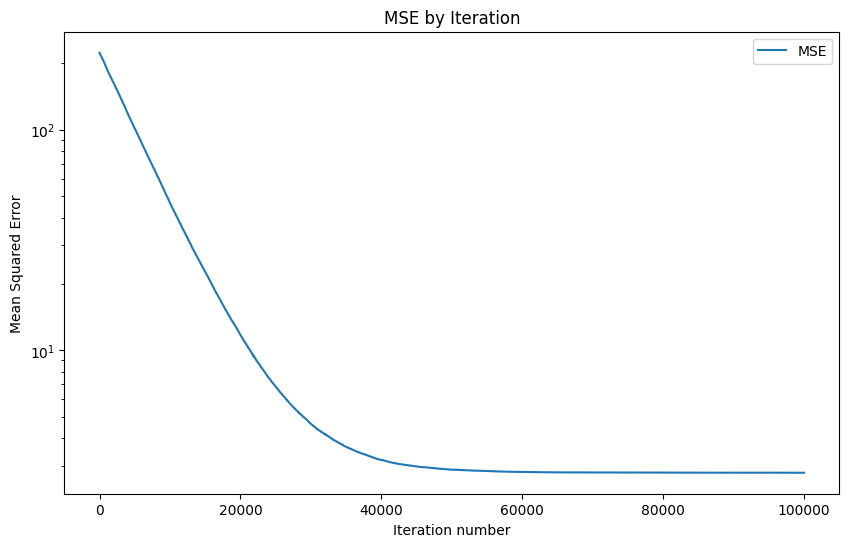

In [23]:
# ваш код
# Задаем начальные параметры
eta =0.008  # Шаг обучения
max_iter = int(1e5)  # 100,000 итераций
weight_diff_threshold = 1e-150  # Порог для остановки алгоритма
w_initial = np.zeros(X.shape[1])  # Начальные веса - вектор нулей

# Выполнение стохастического градиентного спуска
w_final, mse_errors_list, iter_count, w_values_list = stochastic_gradient_descent(
    X, y, w_initial, eta, max_iter, weight_diff_threshold)

# Построение графика ошибок
plt.figure(figsize=(10, 6))
plt.plot(mse_errors_list, label='MSE')
plt.xlabel('Iteration number')
plt.ylabel('Mean Squared Error')
plt.title('MSE by Iteration')
plt.yscale('log')  # Логарифмический масштаб для лучшей визуализации
plt.legend()
plt.show()

In [24]:
# Для поиска итерации на которой достигнут минимум целевой метрики используем Pandas
model_data = pd.DataFrame({'MSE':mse_errors_list, 'w_value':w_values_list})
w_optimal = model_data.iloc[model_data['MSE'].idxmin()][1]
print(f'Минимальная целевая метрика достигнута на {model_data["MSE"].idxmin()} итерации, и составила {mse_errors_list[model_data["MSE"].idxmin()]} \nВеса линейной регрессии при этом составили {w_optimal}')

Минимальная целевая метрика достигнута на 99490 итерации, и составила 2.7841397466977273 
Веса линейной регрессии при этом составили [14.02036992  3.91919402  2.78896586 -0.0207201 ]


**Выведите вектор весов, к которому сошелся метод.**

In [21]:
# ваш код
weghtis = w_final.round(2)
print(f'Веса модели: {weghtis}')

Веса модели: [14.03  3.9   2.8  -0.04]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [25]:
# ваш код
# выведем MSE, посчитанную для нашего метода, а также MSE, посчитанный для модели линейной регрессии из библиотеки sklearn

# Создаем объект линейной регрессии
lr = LinearRegression()

# Обучаем модель на ваших данных
lr.fit(X, y)

# Делаем предсказания на тех же данных
y_pred_sklearn = lr.predict(X)

# Вычисляем MSE для модели scikit-learn
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

# Выведем ошибку, вычисленную при помощи нашего метода
mse_sgd = mse_errors_list[-1].round(3)

print(f'MSE (scikit-learn): {mse_sklearn.round(3)}')
print(f'MSE (SGD): {mse_sgd}')

# Сравниваем ошибки
if mse_sgd < mse_sklearn:
    print("SGD модель работает лучше.")
elif mse_sgd == mse_sklearn:
    print("SGD модель работает так же, как модель scikit-learn.")
else:
    print("Модель scikit-learn работает лучше.")

MSE (scikit-learn): 2.784
MSE (SGD): 2.784
SGD модель работает лучше.


**Вывод:**

нам удалось создать модель, которая работая так же хорошо, как и модель линейной регресси из библиотеки sklearn.